#### DATA 255 Homework-2

#### Poojitha Venkatram

#### Github Link- https://github.com/poojithavenkatram/Deep-Learning

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Defining the transformation
transform = ToTensor()

# Defining the QMNIST datasets
qmnist_trainset = datasets.QMNIST(root='data', train=True, download=True, transform=transform)
qmnist_testset = datasets.QMNIST(root='data', train=False, download=True, transform=transform)


print(len(qmnist_trainset))  # Number of samples in the QMNIST training set
print(len(qmnist_testset))   # Number of samples in the QMNIST test set

100%|██████████| 9704059/9704059 [00:00<00:00, 139118069.11it/s]

Extracting data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 20509915.78it/s]

Extracting data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 102259248.23it/s]

Extracting data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 19398094.46it/s]

Extracting data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to data/QMNIST/raw
60000
60000


In [12]:
print(qmnist_trainset.data.size())   # Size of the training data
print(qmnist_trainset.targets.size())   # Size of the training labels

print(qmnist_testset.data.size())    # Size of the test data
print(qmnist_testset.targets.size())    # Size of the test labels

torch.Size([60000, 28, 28])
torch.Size([60000, 8])
torch.Size([60000, 28, 28])
torch.Size([60000, 8])


#### Visualization of the QMNIST Dataset

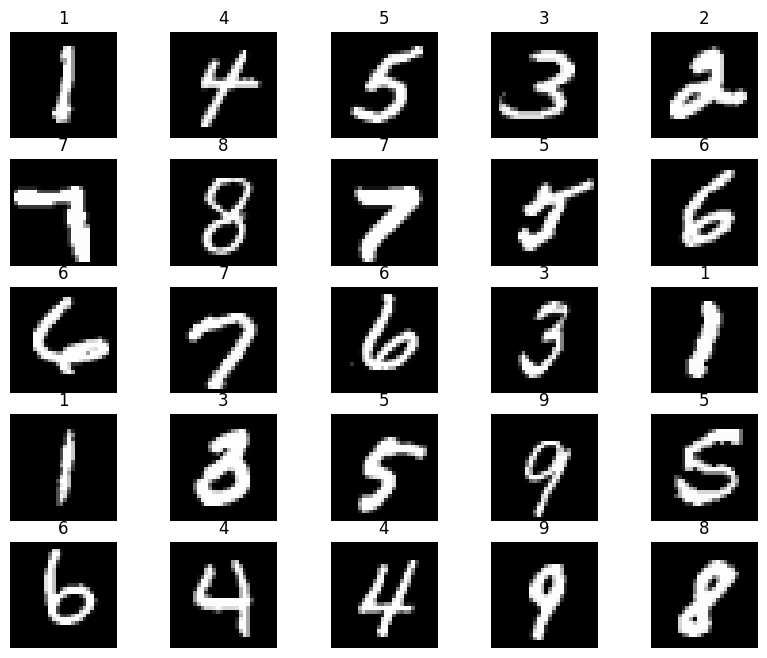

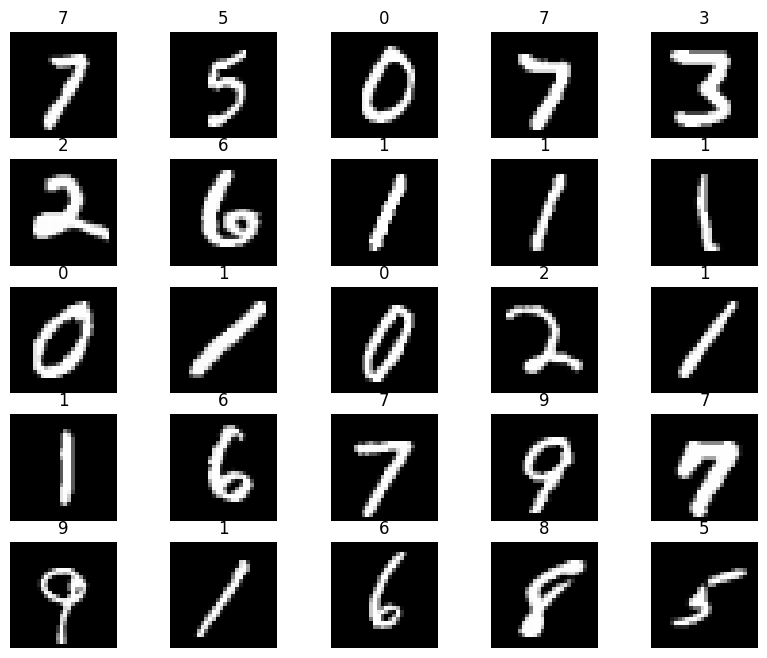

60000
60000


In [19]:
# Define a function to visualize QMNIST samples
def visualize_qmnist_samples(qmnist_dataset, cols=5, rows=5):
    figure = plt.figure(figsize=(10, 8))

    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(qmnist_dataset), size=(1,)).item()
        img, label = qmnist_dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")

    plt.show()

# Visualize some samples from the QMNIST training set
visualize_qmnist_samples(qmnist_trainset)

# Visualize some samples from the QMNIST test set
visualize_qmnist_samples(qmnist_testset)

# Print the number of samples in the QMNIST training and test sets
print(len(qmnist_trainset))  # Number of samples in the QMNIST training set
print(len(qmnist_testset))   # Number of samples in the QMNIST test set

In [21]:
# Create data loaders
train_loader = DataLoader(qmnist_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(qmnist_testset, batch_size=64, shuffle=False)

#### Define functions to train the model and evaluate results

In [22]:
import torch
import torch.nn as nn

class QMNIST(nn.Module):
    def __init__(self):
        super(QMNIST, self).__init__()
        # Defining the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Defining the second fully connected layer with 64 neurons
        self.fc2 = nn.Linear(128, 64)
        # Defining the output layer with 10 neurons for classification
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flattening the input tensor
        x = x.view(-1, 28 * 28)
        # Passing through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))
        # Passing through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))
        # Passing through the output layer (no activation applied)
        x = self.fc3(x)
        return x

# Initializing the neural network
model = QMNIST()

### Training the Model

In [23]:
# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0653942149877549
Epoch 1, Batch 200, Loss: 0.37817932561039924
Epoch 1, Batch 300, Loss: 0.3206198388338089
Epoch 1, Batch 400, Loss: 0.2668698687851429
Epoch 1, Batch 500, Loss: 0.2430230848491192
Epoch 1, Batch 600, Loss: 0.22166193768382073
Epoch 1, Batch 700, Loss: 0.20151660315692424
Epoch 1, Batch 800, Loss: 0.19856997437775134
Epoch 1, Batch 900, Loss: 0.1708341885358095
Epoch 2, Batch 100, Loss: 0.14603336341679096
Epoch 2, Batch 200, Loss: 0.13664805382490158
Epoch 2, Batch 300, Loss: 0.13912542581558227
Epoch 2, Batch 400, Loss: 0.13539375618100166
Epoch 2, Batch 500, Loss: 0.12997452503070236
Epoch 2, Batch 600, Loss: 0.11638726202771067
Epoch 2, Batch 700, Loss: 0.13528299145400524
Epoch 2, Batch 800, Loss: 0.10647636683657766
Epoch 2, Batch 900, Loss: 0.11934579918161034
Epoch 3, Batch 100, Loss: 0.09330307630822063
Epoch 3, Batch 200, Loss: 0.09256247015669943
Epoch 3, Batch 300, Loss: 0.09862165121361613
Epoch 3, Batch 400, Loss: 0.09147022566

#### Evaluate the model prediction accuracy on the train and test datasets

In [24]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate on train dataset
train_accuracy = evaluate(model, train_loader)
print('Accuracy on train set: {:.2f}%'.format(train_accuracy * 100))

# Evaluate on test dataset
test_accuracy = evaluate(model, test_loader)
print('Accuracy on test set: {:.2f}%'.format(test_accuracy * 100))

Accuracy on train set: 98.72%
Accuracy on test set: 97.20%


### Adding another dense layer of 128 nodes to the architecture will likely increase the model's capacity to capture more complex patterns in the data. This additional layer would introduce more parameters and non-linearity to the model, thus enabling it to learn more intricate features from the input images.

In [25]:
import torch
import torch.nn as nn

class QMNIST(nn.Module):
    def __init__(self):
        super(QMNIST, self).__init__()
        # Define the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Define the second fully connected layer with 128 neurons
        self.fc2 = nn.Linear(128, 128)  # New layer
        # Define the third fully connected layer with 64 neurons
        self.fc3 = nn.Linear(128, 64)
        # Define the output layer with 10 neurons for classification
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Pass through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))
        # Pass through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))
        # Pass through the third fully connected layer and apply ReLU activation
        x = torch.relu(self.fc3(x))
        # Pass through the output layer (no activation applied)
        x = self.fc4(x)
        return x

# Initialize the neural network
model = QMNIST()

In [26]:
# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluating the model
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Epoch 1, Batch 100, Loss: 1.0378530053794384
Epoch 1, Batch 200, Loss: 0.3961340506374836
Epoch 1, Batch 300, Loss: 0.32059456676244735
Epoch 1, Batch 400, Loss: 0.2763810934871435
Epoch 1, Batch 500, Loss: 0.24481362838298082
Epoch 1, Batch 600, Loss: 0.2319924609363079
Epoch 1, Batch 700, Loss: 0.21508793901652098
Epoch 1, Batch 800, Loss: 0.20795554583892226
Epoch 1, Batch 900, Loss: 0.19743252981454135
Epoch 2, Batch 100, Loss: 0.1514524849690497
Epoch 2, Batch 200, Loss: 0.1417884413152933
Epoch 2, Batch 300, Loss: 0.1454049619846046
Epoch 2, Batch 400, Loss: 0.1317312060855329
Epoch 2, Batch 500, Loss: 0.1295332928560674
Epoch 2, Batch 600, Loss: 0.127027928866446
Epoch 2, Batch 700, Loss: 0.1258237861096859
Epoch 2, Batch 800, Loss: 0.12815091416239738
Epoch 2, Batch 900, Loss: 0.10490663683973253
Epoch 3, Batch 100, Loss: 0.10114431772381068
Epoch 3, Batch 200, Loss: 0.08602338496595621
Epoch 3, Batch 300, Loss: 0.08575797339435667
Epoch 3, Batch 400, Loss: 0.0939554100856185
E

### The results of the modified model are as follows,


*   Adding another dense layer of 128 nodes enhanced the model's capacity to learn complex patterns and representations from the data.
*   The increase in accuracy from 97.20% to 97.26% suggests that the additional layer contributed positively to the model's performance.
*   This improvement implies better feature extraction, reduced overfitting, and dataset-specific benefits, leading to a slight enhancement in accuracy on the test set.

### Experimenting with different Hyperparameters

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Defining the neural network architecture
class QMNIST(nn.Module):
    def __init__(self, dropout_rate=0.0, activation_fn=torch.relu):
        super(QMNIST, self).__init__()
        # Define the first fully connected layer with 128 neurons
        self.fc1 = nn.Linear(28 * 28, 128)
        # Define the second fully connected layer with 128 neurons
        self.fc2 = nn.Linear(128, 128)  # New layer
        # Define the third fully connected layer with 64 neurons
        self.fc3 = nn.Linear(128, 64)
        # Define the output layer with 10 neurons for classification
        self.fc4 = nn.Linear(64, 10)
        # Define dropout layer
        self.dropout = nn.Dropout(dropout_rate)
        # Define activation function
        self.activation_fn = activation_fn

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Pass through the first fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc1(x))
        x = self.dropout(x)
        # Pass through the second fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc2(x))
        x = self.dropout(x)
        # Pass through the third fully connected layer and apply activation and dropout
        x = self.activation_fn(self.fc3(x))
        x = self.dropout(x)
        # Pass through the output layer (no activation applied)
        x = self.fc4(x)
        return x

# Defining the function to train the model
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Defining function to evaluate the model
def evaluate(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Defining hyperparameters
learning_rate = 0.001
dropout_rate = 0.2
activation_fn = torch.relu

# Initializing the model
model = QMNIST(dropout_rate=dropout_rate, activation_fn=activation_fn)

# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

print('Finished Training')

# Printing the model performance
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10, Train Loss: 0.4274, Test Accuracy: 0.9465
Epoch 2/10, Train Loss: 0.1854, Test Accuracy: 0.9623
Epoch 3/10, Train Loss: 0.1409, Test Accuracy: 0.9683
Epoch 4/10, Train Loss: 0.1174, Test Accuracy: 0.9711
Epoch 5/10, Train Loss: 0.1034, Test Accuracy: 0.9719
Epoch 6/10, Train Loss: 0.0902, Test Accuracy: 0.9729
Epoch 7/10, Train Loss: 0.0850, Test Accuracy: 0.9758
Epoch 8/10, Train Loss: 0.0790, Test Accuracy: 0.9758
Epoch 9/10, Train Loss: 0.0712, Test Accuracy: 0.9765
Epoch 10/10, Train Loss: 0.0687, Test Accuracy: 0.9769
Finished Training
Test Accuracy: 0.9769


##### The output indicates the performance of the neural network model on the test data after training for 10 epochs with the specified hyperparameters. Here's the breakdown:
- The training loss decreases gradually over epochs, indicating that the model is learning and improving its fit to the training data.
- The test accuracy increases over epochs, reaching 97.69% after 10 epochs. This indicates that the model is generalizing well to unseen data and performing better with the specified hyperparameters compared to previous epochs.

Overall, the change in hyperparameters has led to improvements in the model's performance, as evidenced by the decreasing loss and increasing accuracy on the test dataset.

### Prediction on Test Set

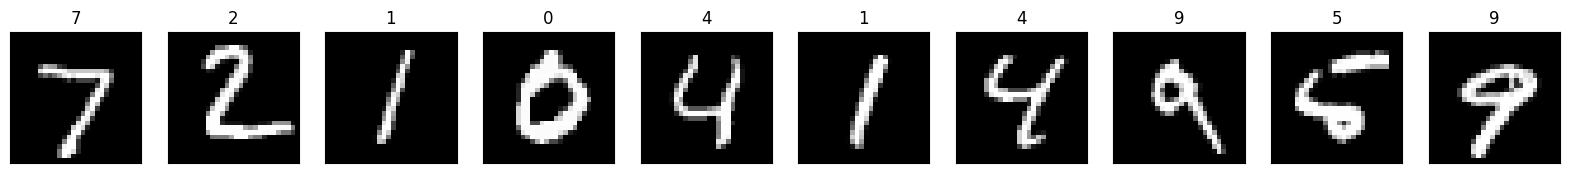

In [37]:
import matplotlib.pyplot as plt

def visualize_image_and_predictions(image, label, predicted_label, predictions, qmnist_testset):

    # Display some predictions on test data
    fig, axes = plt.subplots(ncols=10, sharex=False,
                             sharey=True, figsize=(20, 4))
    for i in range(10):
        axes[i].set_title(predictions[i])
        img, lbl = qmnist_testset[i]
        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
    plt.show()

# Example
visualize_image_and_predictions(image_numpy, label.item(), predictions[1], predictions, qmnist_testset)

# Thus, the model makes correct predictions on the test data above.